In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

%matplotlib inline

# Data preparation

In [2]:
df = pd.read_csv("../data/Iris.csv")
df.head()

,Id,sepal_length,sepal_width,petal_length,petal_width,species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
y = pd.get_dummies(df.species).values
x = df.drop(["Id", "species"], axis=1).values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=20, random_state=4)
N = y_train.size

# Helper Functions

In [4]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def mean_squared_error(predictions, labels):
    N = labels.size
    mse = ((predictions - labels)**2).sum() / (2*N)
    
    return mse

def accuracy(predictions, labels):
    predicions_correct = predictions.argmax(axis=1) == labels.argmax(axis=1)
    accuracy = predicions_correct.mean()
    
    return accuracy

# 1. Training Attempt

In [5]:
# hyperparameters
learning_rate = 0.1
epochs = 1000

n_input = 4
n_hidden = 2
n_output = 3

np.random.seed(10)
weights_1 = np.random.normal(scale=0.5, size=(n_input, n_hidden))   # (4, 2)
weights_2 = np.random.normal(scale=0.5, size=(n_hidden, n_output))  # (2, 3)

# training the neural net
monitoring = {"mean_squared_error": [], "accuracy": []}
for epoch in range(epochs):    
    
    # feedforward
    hidden_layer_inputs = np.dot(x_train, weights_1)
    hidden_layer_outputs = sigmoid(hidden_layer_inputs)

    output_layer_inputs = np.dot(hidden_layer_outputs, weights_2)
    output_layer_outputs = sigmoid(output_layer_inputs)
    
    
    # monitor training process
    mse = mean_squared_error(output_layer_outputs, y_train)
    acc = accuracy(output_layer_outputs, y_train)
    
    monitoring["mean_squared_error"].append(mse)
    monitoring["accuracy"].append(acc)
    
    
    # backpropagation
    output_layer_error = output_layer_outputs - y_train
    output_layer_delta = output_layer_error * output_layer_outputs * (1 - output_layer_outputs)

    hidden_layer_error = np.dot(output_layer_delta, weights_2.T)
    hidden_layer_delta = hidden_layer_error * hidden_layer_outputs * (1 - hidden_layer_outputs)

    
    # weight updates
    weights_2_update = np.dot(hidden_layer_outputs.T, output_layer_delta) / N
    weights_1_update = np.dot(x_train.T, hidden_layer_delta) / N

    weights_2 = weights_2 - learning_rate * weights_2_update
    weights_1 = weights_1 - learning_rate * weights_1_update

monitoring_df = pd.DataFrame(monitoring)

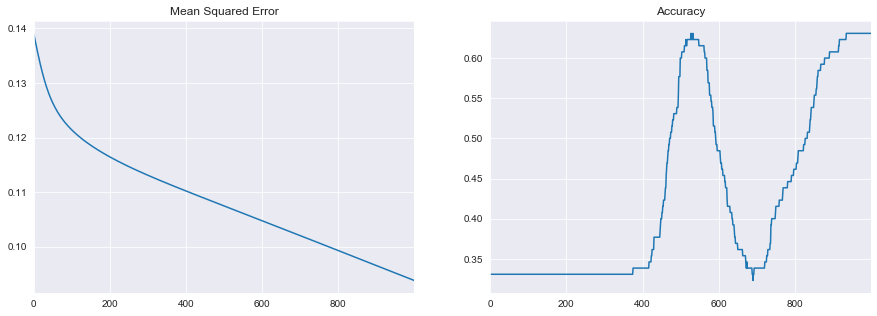

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

monitoring_df.mean_squared_error.plot(ax=axes[0], title="Mean Squared Error")
monitoring_df.accuracy.plot(ax=axes[1], title="Accuracy");

# 2. Training Attempt

In [7]:
# hyperparameters
learning_rate = 0.1
epochs = 10000

n_input = 4
n_hidden = 2
n_output = 3

np.random.seed(10)
weights_1 = np.random.normal(scale=0.5, size=(n_input, n_hidden))   # (4, 2)
weights_2 = np.random.normal(scale=0.5, size=(n_hidden, n_output))  # (2, 3)

# training the neural net
monitoring = {"mean_squared_error": [], "accuracy": []}
for epoch in range(epochs):    
    
    # feedforward
    hidden_layer_inputs = np.dot(x_train, weights_1)
    hidden_layer_outputs = sigmoid(hidden_layer_inputs)

    output_layer_inputs = np.dot(hidden_layer_outputs, weights_2)
    output_layer_outputs = sigmoid(output_layer_inputs)
    
    
    # monitor training process
    mse = mean_squared_error(output_layer_outputs, y_train)
    acc = accuracy(output_layer_outputs, y_train)
    
    monitoring["mean_squared_error"].append(mse)
    monitoring["accuracy"].append(acc)
    
    
    # backpropagation
    output_layer_error = output_layer_outputs - y_train
    output_layer_delta = output_layer_error * output_layer_outputs * (1 - output_layer_outputs)

    hidden_layer_error = np.dot(output_layer_delta, weights_2.T)
    hidden_layer_delta = hidden_layer_error * hidden_layer_outputs * (1 - hidden_layer_outputs)

    
    # weight updates
    weights_2_update = np.dot(hidden_layer_outputs.T, output_layer_delta) / N
    weights_1_update = np.dot(x_train.T, hidden_layer_delta) / N

    weights_2 = weights_2 - learning_rate * weights_2_update
    weights_1 = weights_1 - learning_rate * weights_1_update

monitoring_df = pd.DataFrame(monitoring)

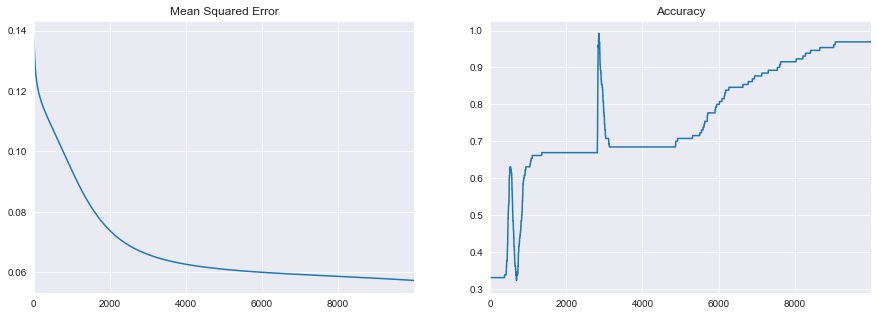

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

monitoring_df.mean_squared_error.plot(ax=axes[0], title="Mean Squared Error")
monitoring_df.accuracy.plot(ax=axes[1], title="Accuracy");

# 3. Training Attempt

In [9]:
# hyperparameters
learning_rate = 0.1
epochs = 15000

n_input = 4
n_hidden = 2
n_output = 3

np.random.seed(10)
weights_1 = np.random.normal(scale=0.5, size=(n_input, n_hidden))   # (4, 2)
weights_2 = np.random.normal(scale=0.5, size=(n_hidden, n_output))  # (2, 3)

# training the neural net
monitoring = {"mean_squared_error": [], "accuracy": []}
for epoch in range(epochs):    
    
    # feedforward
    hidden_layer_inputs = np.dot(x_train, weights_1)
    hidden_layer_outputs = sigmoid(hidden_layer_inputs)

    output_layer_inputs = np.dot(hidden_layer_outputs, weights_2)
    output_layer_outputs = sigmoid(output_layer_inputs)
    
    
    # monitor training process
    mse = mean_squared_error(output_layer_outputs, y_train)
    acc = accuracy(output_layer_outputs, y_train)
    
    monitoring["mean_squared_error"].append(mse)
    monitoring["accuracy"].append(acc)
    
    
    # backpropagation
    output_layer_error = output_layer_outputs - y_train
    output_layer_delta = output_layer_error * output_layer_outputs * (1 - output_layer_outputs)

    hidden_layer_error = np.dot(output_layer_delta, weights_2.T)
    hidden_layer_delta = hidden_layer_error * hidden_layer_outputs * (1 - hidden_layer_outputs)

    
    # weight updates
    weights_2_update = np.dot(hidden_layer_outputs.T, output_layer_delta) / N
    weights_1_update = np.dot(x_train.T, hidden_layer_delta) / N

    weights_2 = weights_2 - learning_rate * weights_2_update
    weights_1 = weights_1 - learning_rate * weights_1_update

monitoring_df = pd.DataFrame(monitoring)

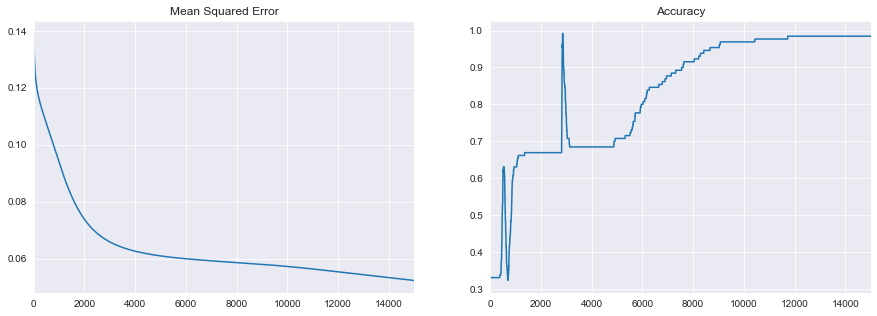

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

monitoring_df.mean_squared_error.plot(ax=axes[0], title="Mean Squared Error")
monitoring_df.accuracy.plot(ax=axes[1], title="Accuracy");

# Test Data

In [11]:
# feedforward
hidden_layer_inputs = np.dot(x_test, weights_1)
hidden_layer_outputs = sigmoid(hidden_layer_inputs)

output_layer_inputs = np.dot(hidden_layer_outputs, weights_2)
output_layer_outputs = sigmoid(output_layer_inputs)

In [12]:
acc = accuracy(output_layer_outputs, y_test)
print("Accuracy: {}".format(acc))

Accuracy: 0.95


# Different Train-Test-Split and starting values for the weights

## 1. Training Attempt

In [13]:
y = pd.get_dummies(df.species).values
x = df.drop(["Id", "species"], axis=1).values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=20, random_state=7)
N = y_train.size

In [14]:
# hyperparameters
learning_rate = 0.1
epochs = 15000

n_input = 4
n_hidden = 2
n_output = 3

np.random.seed(3)
weights_1 = np.random.normal(scale=0.5, size=(n_input, n_hidden))   # (4, 2)
weights_2 = np.random.normal(scale=0.5, size=(n_hidden, n_output))  # (2, 3)

# training the neural net
monitoring = {"mean_squared_error": [], "accuracy": []}
for epoch in range(epochs):    
    
    # feedforward
    hidden_layer_inputs = np.dot(x_train, weights_1)
    hidden_layer_outputs = sigmoid(hidden_layer_inputs)

    output_layer_inputs = np.dot(hidden_layer_outputs, weights_2)
    output_layer_outputs = sigmoid(output_layer_inputs)
    
    
    # monitor training process
    mse = mean_squared_error(output_layer_outputs, y_train)
    acc = accuracy(output_layer_outputs, y_train)
    
    monitoring["mean_squared_error"].append(mse)
    monitoring["accuracy"].append(acc)
    
    
    # backpropagation
    output_layer_error = output_layer_outputs - y_train
    output_layer_delta = output_layer_error * output_layer_outputs * (1 - output_layer_outputs)

    hidden_layer_error = np.dot(output_layer_delta, weights_2.T)
    hidden_layer_delta = hidden_layer_error * hidden_layer_outputs * (1 - hidden_layer_outputs)

    
    # weight updates
    weights_2_update = np.dot(hidden_layer_outputs.T, output_layer_delta) / N
    weights_1_update = np.dot(x_train.T, hidden_layer_delta) / N

    weights_2 = weights_2 - learning_rate * weights_2_update
    weights_1 = weights_1 - learning_rate * weights_1_update

monitoring_df = pd.DataFrame(monitoring)

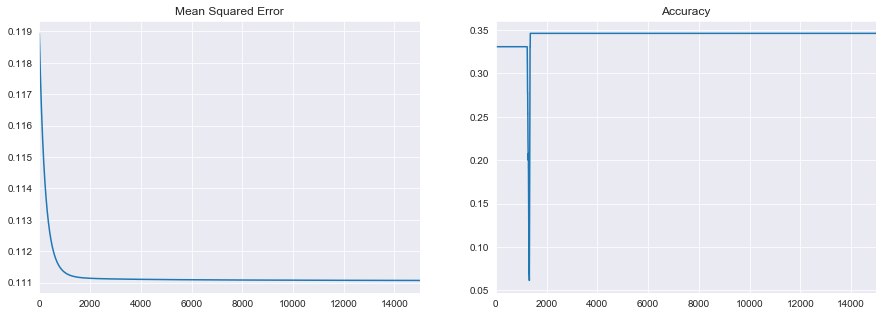

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

monitoring_df.mean_squared_error.plot(ax=axes[0], title="Mean Squared Error")
monitoring_df.accuracy.plot(ax=axes[1], title="Accuracy");

## 2. Training Attempt

In [16]:
# hyperparameters
learning_rate = 0.1
epochs = 15000

n_input = 4
n_hidden = 6
n_output = 3

np.random.seed(3)
weights_1 = np.random.normal(scale=0.5, size=(n_input, n_hidden))   # (4, 2)
weights_2 = np.random.normal(scale=0.5, size=(n_hidden, n_output))  # (2, 3)

# training the neural net
monitoring = {"mean_squared_error": [], "accuracy": []}
for epoch in range(epochs):    
    
    # feedforward
    hidden_layer_inputs = np.dot(x_train, weights_1)
    hidden_layer_outputs = sigmoid(hidden_layer_inputs)

    output_layer_inputs = np.dot(hidden_layer_outputs, weights_2)
    output_layer_outputs = sigmoid(output_layer_inputs)
    
    
    # monitor training process
    mse = mean_squared_error(output_layer_outputs, y_train)
    acc = accuracy(output_layer_outputs, y_train)
    
    monitoring["mean_squared_error"].append(mse)
    monitoring["accuracy"].append(acc)
    
    
    # backpropagation
    output_layer_error = output_layer_outputs - y_train
    output_layer_delta = output_layer_error * output_layer_outputs * (1 - output_layer_outputs)

    hidden_layer_error = np.dot(output_layer_delta, weights_2.T)
    hidden_layer_delta = hidden_layer_error * hidden_layer_outputs * (1 - hidden_layer_outputs)

    
    # weight updates
    weights_2_update = np.dot(hidden_layer_outputs.T, output_layer_delta) / N
    weights_1_update = np.dot(x_train.T, hidden_layer_delta) / N

    weights_2 = weights_2 - learning_rate * weights_2_update
    weights_1 = weights_1 - learning_rate * weights_1_update

monitoring_df = pd.DataFrame(monitoring)

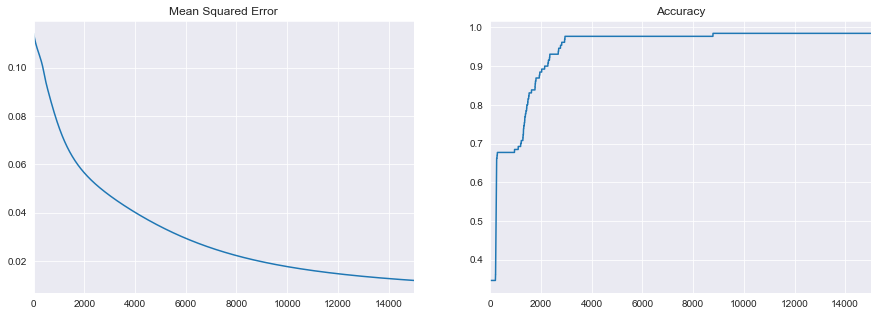

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

monitoring_df.mean_squared_error.plot(ax=axes[0], title="Mean Squared Error")
monitoring_df.accuracy.plot(ax=axes[1], title="Accuracy");

# Test Data

In [18]:
# feedforward
hidden_layer_inputs = np.dot(x_test, weights_1)
hidden_layer_outputs = sigmoid(hidden_layer_inputs)

output_layer_inputs = np.dot(hidden_layer_outputs, weights_2)
output_layer_outputs = sigmoid(output_layer_inputs)

In [19]:
acc = accuracy(output_layer_outputs, y_test)
print("Accuracy: {}".format(acc))

Accuracy: 0.9
